#### Notebook with code for the Capstone Project 
This notebook is part of the Peer-Graded Assignment for the 5th week of the course Applied Data Science Capstone from Coursera+IBM.

<h1><center>Market Analysis: A new café in Houston, TX</center></h1>

<center>Joana Ázara</center>

In [114]:
import requests
import wget
import urllib
from bs4 import BeautifulSoup
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import re
import geocoder
import censusdata
pd.set_option('display.precision',2)
#https://jtleider.github.io/censusdata/api.html

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import seaborn as sns

### 1. Introduction: <br>Ranking of coffee consumption

In [2]:
# Scraping the web for coffee consumption data
#-------------------------------------------
url='https://www.worldatlas.com/articles/top-10-coffee-consuming-nations.html'
wiki_html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(wiki_html)
table=soup.find('table')

# define the dataframe columns
column_names = ['Rank','Country', 'Consumption_kg'] 

# instantiate the dataframe
df_coffee = pd.DataFrame(columns=column_names)

i=0
for country in table.tbody.find_all('tr'):
    temp=[]
    for info in country.find_all('td'):
        temp.append(info.text.replace('\n',''))
    
    if temp!=[]: #skip in case there are no "td"
            df_coffee=df_coffee.append({'Rank':temp[0],'Country':temp[1],'Consumption_kg':temp[2]}, ignore_index=True)


# getting the coffee consumption only in Kg
df_coffee['Consumption_kg'] = df_coffee['Consumption_kg'].astype(float)
df_coffee['Rank'] = df_coffee['Rank'].astype(int)
df_coffee['Rank_Country']=df_coffee['Rank'].map(str)+'-'+df_coffee['Country']

In [3]:
# Generating a new dataframe for top 10 + USA
top10=df_coffee[:10]
usa=df_coffee.loc[df_coffee['Rank']==25]
frames = [top10, usa]
coffee_top10_usa = pd.concat(frames)
coffee_top10_usa

,Rank,Country,Consumption_kg,Rank_Country
0,1,Finland,12.0,1-Finland
1,2,Norway,9.9,2-Norway
2,3,Iceland,9.0,3-Iceland
3,4,Denmark,8.7,4-Denmark
4,5,Netherlands,8.4,5-Netherlands
5,6,Sweden,8.2,6-Sweden
6,7,Switzerland,7.9,7-Switzerland
7,8,Belgium,6.8,8-Belgium
8,9,Luxembourg,6.5,9-Luxembourg
9,10,Canada,6.5,10-Canada


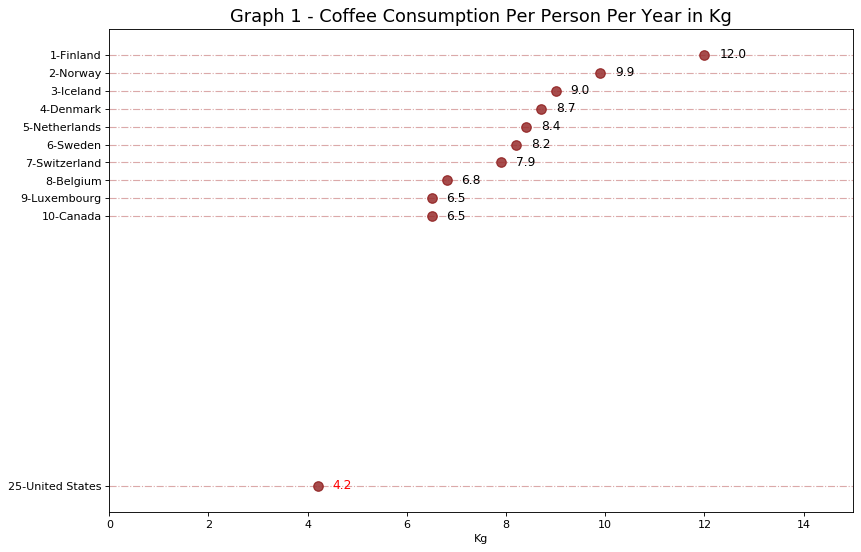

In [4]:
# Draw plot
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)
ax.hlines(y=coffee_top10_usa.index, xmin=0, xmax=15, color='brown', alpha=0.4, linewidth=1, linestyles='dashdot')
ax.scatter(y=coffee_top10_usa.index, x=coffee_top10_usa['Consumption_kg'], s=75, color='maroon', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Graph 1 - Coffee Consumption Per Person Per Year in Kg', fontdict={'size':16})
ax.set_xlabel('Kg')
ax.set_yticks(coffee_top10_usa.index)
ax.set_yticklabels(coffee_top10_usa['Rank_Country'].str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 15)
ax.set_ylim(ax.get_ylim()[::-1])
ax.text(4.5,24.2 , '4.2', color='red', bbox=dict(facecolor='none', edgecolor='none'),fontsize=11) # USA
for i in range(0,10):
    ax.text(df_coffee.loc[i,'Consumption_kg']+0.3,df_coffee.loc[i,'Rank']-0.8, df_coffee.loc[i,'Consumption_kg'], color='black',bbox=dict(facecolor='none', edgecolor='none'),fontsize=11) # No1 Turkey


plt.show()

### Ranking of tea consumption

In [5]:
# Scraping the web for tea consumption data
#-------------------------------------------
url='https://en.wikipedia.org/wiki/List_of_countries_by_tea_consumption_per_capita'
wiki_html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(wiki_html)
table=soup.find('table')

# define the dataframe columns
column_names = ['Rank','Country', 'Consumption_kg'] 

# instantiate the dataframe
df_tea = pd.DataFrame(columns=column_names)

i=0
for country in table.tbody.find_all('tr'):
    temp=[]
    for info in country.find_all('td'):
        temp.append(info.text.replace('\n',''))
    
    if temp!=[]: #skip in case there are no "td"
            df_tea=df_tea.append({'Rank':temp[0],'Country':temp[1],'Consumption_kg':temp[2]}, ignore_index=True)


# getting the tea consumption only in Kg
df_tea['Consumption_kg'] = df_tea['Consumption_kg'].str.extract("\((.*)\)") 
df_tea['Consumption_kg'] = df_tea['Consumption_kg'].str.slice(0, 4) 
df_tea['Consumption_kg'] = df_tea['Consumption_kg'].astype(float)
df_tea.loc[6, 'Country'] = 'Chile'
df_tea['Country'].str.strip()
df_tea['Rank'] = df_tea['Rank'].astype(int)
df_tea['Rank_Country']=df_tea['Rank'].map(str)+'-'+df_tea['Country']

In [6]:
# Generating a new dataframe for top 10 + USA
top10=df_tea[:10]
usa=df_tea.loc[df_tea['Rank']==34]
frames = [top10, usa]
tea_top10_usa = pd.concat(frames)
tea_top10_usa

,Rank,Country,Consumption_kg,Rank_Country
0,1,Turkey,3.16,1- Turkey
1,2,Ireland,2.19,2- Ireland
2,3,United Kingdom,1.94,3- United Kingdom
3,4,Russia,1.38,4- Russia
4,5,Morocco,1.22,5- Morocco
5,6,New Zealand,1.19,6- New Zealand
6,7,Chile,1.19,7-Chile
7,8,Egypt,1.01,8- Egypt
8,9,Poland,1.00,9- Poland
9,10,Japan,0.97,10- Japan


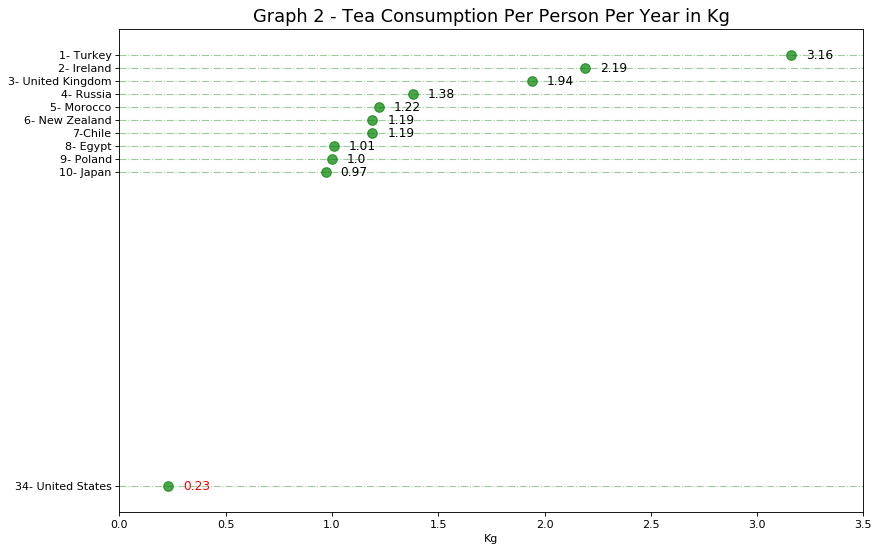

In [7]:
# Draw plot
fig, ax = plt.subplots(figsize=(12,8), dpi= 80)
ax.hlines(y=tea_top10_usa.index, xmin=0, xmax=5, color='green', alpha=0.4, linewidth=1, linestyles='dashdot')
ax.scatter(y=tea_top10_usa.index, x=tea_top10_usa['Consumption_kg'], s=75, color='green', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Graph 2 - Tea Consumption Per Person Per Year in Kg', fontdict={'size':16})
ax.set_xlabel('Kg')
ax.set_yticks(tea_top10_usa.index)
ax.set_yticklabels(tea_top10_usa['Rank_Country'].str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 3.5)
ax.set_ylim(ax.get_ylim()[::-1])
ax.text(0.3, 33.3, '0.23', color='red', bbox=dict(facecolor='none', edgecolor='none'),fontsize=11) # USA

for i in range(0,10):
    ax.text(df_tea.loc[i,'Consumption_kg']+0.07,df_tea.loc[i,'Rank']-0.7, df_tea.loc[i,'Consumption_kg'], color='black',bbox=dict(facecolor='none', edgecolor='none'),fontsize=11) # No1 Turkey

plt.show()

## 2. Data

### Zip Codes, Latitude and Longitude for Houston Neighborhoods

In [6]:
# Scraping the web for the Houston Main Neighborhhods Zip Codes
#---------------------------------------------------------------
url='http://www.mccannproperties.com/Houston-Neighborhood-ZipCodes.php'
wiki_html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(wiki_html)
main_area=soup.find('main')
#main_area.prettify()

# define the dataframe columns
column_names = ['Neighborhood+Zip'] 

# instantiate the dataframe
df_neighborhood = pd.DataFrame(columns=column_names)

i=0
for neighborhood in main_area.find_all('p'):
    temp=[]
    if i<22:
        temp.append(neighborhood.text.replace('\n',''))
    
        if temp!=[]: #skip in case there are no "td"
            df_neighborhood=df_neighborhood.append({'Neighborhood+Zip':temp[0]}, ignore_index=True)
    i=i+1

#Breaking Neighborhood+Zip column into 2 columns: Neighborhood and ZipCode
i=0
for line in df_neighborhood['Neighborhood+Zip']:
    a=line.find('77')
    zip_code=line[a:a+5]
    neigh=line.replace(zip_code,'')
    df_neighborhood.loc[i,'Neighborhood']=neigh
    df_neighborhood.loc[i,'zipcode']=zip_code
    i=i+1

#Treating the lines with 2 zipcodes
i=0
b=0
z=df_neighborhood['zipcode'].tolist()
for line in df_neighborhood['Neighborhood']:
    a=line.find('77')
    if a != -1:
        zip_code=line[a:a+5]
        neigh=line.replace(zip_code,'')
        
        if zip_code in z:
            df_neighborhood.loc[z.index(zip_code),'Neighborhood']=df_neighborhood.loc[z.index(zip_code),'Neighborhood']+','+neigh
            df_neighborhood.loc[i,'Neighborhood']=neigh
        
            #print(z.index(zip_code))
        else:
            df_neighborhood.loc[21+b,'Neighborhood']=neigh
            df_neighborhood.loc[21+b,'zipcode']=zip_code
            df_neighborhood.loc[i,'Neighborhood']=neigh
            b=b+1
    i=i+1

# Excluding the column Neighborhood+zip
df_neighborhood.drop(['Neighborhood+Zip'], axis=1,inplace=True)

# Cleaning the data at the names of neighborhoods
i=0
for line in df_neighborhood['Neighborhood']:
    z=str(line)
    z=z.strip()
    z=z.replace('parts of','')
    z=z.replace('-','')
    z=z.replace(' & ',', ')
    z=z.replace('/',', ')
    df_neighborhood.loc[i,'Neighborhood']=z
    i=i+1
    
df_neighborhood.loc[0,'Neighborhood']='Montrose, Midtown'

i=0
for line in df_neighborhood['zipcode']:
    z=str(line)
    z=z.strip()
    df_neighborhood.loc[i,'zipcode']=z
    i=i+1

# Excluding the city of Bellaire (that is not Houston even though it's listed at the website as so)
df_neighborhood.drop(22,inplace=True)


#### Including columns of latitude and longitude for each zip code

In [7]:
#Looping through the postal codes
for postal_code in df_neighborhood['zipcode']:

    #initialize variables to None
    lat_lng_coords=None
    
    
    #loop until you get the coordinates
    while(lat_lng_coords is None):
            g=geocoder.arcgis('{}, Houston, Texas'.format(postal_code))
            lat_lng_coords=g.latlng
            i=i+1
    df_neighborhood.loc[df_neighborhood['zipcode'] == postal_code, 'Latitude']=lat_lng_coords[0]
    df_neighborhood.loc[df_neighborhood['zipcode'] == postal_code, 'Longitude']=lat_lng_coords[1]

df_neighborhood    

In [8]:
# Saving in a csv file to avoid the need to avoid re-running the routine
df_neighborhood.to_csv('houston_neighborhood.csv', encoding='utf-8', index=False)

,Neighborhood,zipcode,Latitude,Longitude
0,"Montrose, Midtown",77006,29.74,-95.39
1,"Midtown,",77004,29.73,-95.38
2,"Downtown,",77002,29.76,-95.37
3,"Memorial Park, Rice Military",77007,29.77,-95.42
4,Heights,77008,29.81,-95.42
5,Woodland Heights,77009,29.78,-95.36
6,Greenway Plaza,77046,29.73,-95.43
7,Upper Kirby,77098,29.74,-95.41
8,"River Oaks, West Gray",77019,29.76,-95.38
9,"Bellaire,",77401,29.72,-95.45


In [9]:
# Saving in a csv file to avoid the need to avoid re-running the routine
df_neighborhood.to_csv('houston_neighborhood.csv', encoding='utf-8', index=False)

In [10]:
df_neighborhood=pd.read_csv('houston_neighborhood.csv')
df_neighborhood.dtypes

Neighborhood     object
zipcode           int64
Latitude        float64
Longitude       float64
dtype: object

### Population data from the American Community Survey

In [55]:
# Finding the table with median income

# >> uncomment the line below to run the search
# -------------------------------------------------
#censusdata.search('acs5',2015,'concept','median income')

In [56]:
# Table found:
#B19326: Median Income in the Past 12 Months (in 2015 Inflation-Adjusted Dollars) by Sex by Work Experience in the Past 12 Months for the Population 15 Years and Over With Income

# Checking the labels of the data provided at this table:
#censusdata.printtable(censusdata.censustable('acs5', 2015, 'B19326'))

The description is not showing the complete name of the labels. So we have to do a manually search using the returned values from the 1st query (censusdata.search). By doing that we get to the following labels:

Labels:<br>
B19326_001E: Total <br>
B19326_002E: Male Total <br>
B19326_003E: Male - worked full-time year-round in the last 12 months<br>
B19326_004E: Male - other<br>
B19326_005E: Female Total<br>
B19326_006E: Female - worked full-time year-round in the last 12 months<br>
B19326_007E: Female - other<br>

In [57]:
# Finding the table with education

# >> uncomment the line below to run the search
# -------------------------------------------------
#censusdata.search('acs5', 2015, 'concept', 'education')

In [58]:
# Tables found:
#B15001: SEX BY AGE BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 18 YEARS AND OVER
#B15002: Sex by Educational Attainment for the Population 25 Years and over
#B15003: Educational Attainment for the Population 25 Years and Over

# --> We are using the B15001

# Checking the labels of the data provided at this table:
censusdata.printtable(censusdata.censustable('acs5', 2015, 'B15001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B15001_001E  | B15001.  SEX BY AGE BY EDUCATI | Total:                                                   | int  
B15001_002E  | B15001.  SEX BY AGE BY EDUCATI | Male:                                                    | int  
B15001_003E  | B15001.  SEX BY AGE BY EDUCATI | !! Male: 18 to 24 years:                                 | int  
B15001_004E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Less than 9th grade          | int  
B15001_005E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: 9th to 12th grade, no diplom | int  
B15001_006E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: High school graduate (includ | int  
B15001_007E  | B15001.  SEX BY AGE BY EDUCATI | !! !! Male: 18 to 24 years: Some college, no 

In [41]:
# There is a limit of labels that can be passed by at a time for the queries. So we will have to
# perform 2 queries to get all the information we need.

zipcodes=df_neighborhood['zipcode'].astype(str)
# Query 1
# --------
#Time to get the data!!!
df_census=pd.DataFrame()
for zipcode in zipcodes:
    #print(zipcode)
    df_temp = censusdata.download('acs5', 2017,
                             censusdata.censusgeo([('zip code tabulation area', zipcode)]),
                             ['B19326_001E','B19326_002E','B19326_005E','B15001_001E','B15001_002E','B15001_003E','B15001_004E','B15001_005E','B15001_006E','B15001_007E','B15001_008E','B15001_009E','B15001_010E','B15001_011E','B15001_012E','B15001_013E','B15001_014E','B15001_015E','B15001_016E','B15001_017E','B15001_018E','B15001_019E','B15001_020E','B15001_021E','B15001_022E','B15001_023E','B15001_024E','B15001_025E','B15001_026E','B15001_027E','B15001_028E','B15001_029E','B15001_030E','B15001_031E','B15001_032E','B15001_033E','B15001_034E','B15001_035E','B15001_036E','B15001_037E','B15001_038E','B15001_039E','B15001_040E','B15001_041E','B15001_042E'])
    df_temp['ZipCode']=zipcode
    df_census=df_census.append(df_temp,ignore_index=True)
#df_census.head()


In [46]:
# Query 2
# --------
df_census2=pd.DataFrame()
for zipcode in zipcodes:
    
    df_temp = censusdata.download('acs5', 2017,
                             censusdata.censusgeo([('zip code tabulation area', zipcode)]),
                             ['B19326_003E','B19326_004E','B19326_006E','B19326_007E','B15001_043E','B15001_044E','B15001_045E','B15001_046E','B15001_047E','B15001_048E','B15001_049E','B15001_050E','B15001_051E','B15001_052E','B15001_053E','B15001_054E','B15001_055E','B15001_056E','B15001_057E','B15001_058E','B15001_059E','B15001_060E','B15001_061E','B15001_062E','B15001_063E','B15001_064E','B15001_065E','B15001_066E','B15001_067E','B15001_068E','B15001_069E','B15001_070E','B15001_071E','B15001_072E','B15001_073E','B15001_074E','B15001_075E','B15001_076E','B15001_077E','B15001_078E','B15001_079E','B15001_080E','B15001_081E','B15001_082E','B15001_083E'])
    df_temp['ZipCode']=zipcode
    df_census2=df_census2.append(df_temp,ignore_index=True)

#df_census2.head()

In [47]:
complete_census=pd.merge(df_census, df_census2, on='ZipCode')

# Saving in a csv file to avoid the need to avoid re-running the routine
complete_census.to_csv('week5_census.csv', encoding='utf-8', index=False)

In [48]:
complete_census=pd.read_csv('week5_census.csv')

In [49]:
complete_census.shape

(24, 91)

In [50]:
complete_census.head()

,B19326_001E,B19326_002E,B19326_005E,B15001_001E,B15001_002E,B15001_003E,B15001_004E,B15001_005E,B15001_006E,B15001_007E,...,B15001_074E,B15001_075E,B15001_076E,B15001_077E,B15001_078E,B15001_079E,B15001_080E,B15001_081E,B15001_082E,B15001_083E
0,55950,62941,46928,20194,11305,1049,29,56,100,218,...,773,545,932,58,11,96,159,88,193,327
1,22499,25959,19213,32793,16608,5402,0,152,748,3815,...,865,714,1925,156,115,450,434,53,310,407
2,24254,22177,36607,12203,10298,2075,145,921,508,221,...,136,127,178,0,0,25,77,9,31,36
3,73209,86163,61533,31926,16492,1033,15,57,4,164,...,906,892,1128,224,88,181,186,10,298,141
4,54244,65395,49051,28723,14266,747,8,142,307,43,...,1141,1061,1950,230,249,701,286,51,279,154


In [52]:
# Create a simplified dataframe with the information needed:

houston_population=pd.DataFrame()
houston_population['zipcode']=complete_census['ZipCode']
houston_population['Median Income']=complete_census['B19326_001E']
houston_population['Median Income - Employed']=complete_census['B19326_003E']+complete_census['B19326_006E']
houston_population['Population 18+']=complete_census['B15001_001E']
houston_population['Population 25-44']=complete_census['B15001_011E']+complete_census['B15001_019E']+complete_census['B15001_052E']+complete_census['B15001_060E']
houston_population['Population 25-44 with Degree']=complete_census['B15001_016E']+complete_census['B15001_017E']+complete_census['B15001_018E']+complete_census['B15001_024E']+complete_census['B15001_025E']+complete_census['B15001_026E']+complete_census['B15001_057E']+complete_census['B15001_058E']+complete_census['B15001_059E']+complete_census['B15001_065E']+complete_census['B15001_066E']+complete_census['B15001_067E']
houston_population

,zipcode,Median Income,Median Income - Employed,Population 18+,Population 25-44,Population 25-44 with Degree
0,77006,55950,142568,20194,10122,7835
1,77004,22499,103813,32793,11382,6323
2,77002,24254,107684,12203,6134,2081
3,77007,73209,171943,31926,19434,17100
4,77008,54244,154166,28723,15403,11985
5,77009,25738,87253,28880,11802,5157
6,77046,77911,-666570416,1003,431,365
7,77098,61816,161235,12175,6578,5714
8,77019,65988,170563,18748,7743,6848
9,77401,80877,262155,14025,4455,3974


### Venues for each neighborhood - Source: Foursquare

In [53]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'PU2M2NDZNNYIYMAIGGABUUSUJOI0RC2X0X1YGVAGTG5B514S' # your Foursquare ID
CLIENT_SECRET = '2KRDYEHZW4JS5HKY3XQXE54FQUYLRJU5BYMZXG2RC3VAI5ZP' # your Foursquare Secret
VERSION = '20180604'


In [54]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


# Let's create a function to repeat the same process to all the neighborhoods in toronto
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['zipcode', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:
# Call the function
LIMIT=600

houston_venues_pre = getNearbyVenues(names=df_neighborhood['zipcode'],
                                   latitudes=df_neighborhood['Latitude'],
                                   longitudes=df_neighborhood['Longitude']
                                  )


In [56]:
# Let's check the size of the resulting dataframe
print('shape: ',houston_venues_pre.shape)
houston_venues_pre.head(5)

shape:  (818, 5)


,zipcode,Venue,Venue Latitude,Venue Longitude,Venue Category
0,77006,Fix Coffeebar,29.74,-95.39,Coffee Shop
1,77006,Love Buzz,29.74,-95.39,Bar
2,77006,Dolce Vita Pizzeria & Enoteca,29.74,-95.39,Pizza Place
3,77006,El Tiempo 1308 Annex Cantina,29.74,-95.39,Mexican Restaurant
4,77006,Bistecca Ristorante,29.74,-95.38,Italian Restaurant


In [58]:
houston_venues_pre.groupby('zipcode').count()

,Venue,Venue Latitude,Venue Longitude,Venue Category
zipcode,,,,
77002,100,100,100,100
77003,13,13,13,13
77004,40,40,40,40
77005,60,60,60,60
77006,52,52,52,52
77007,29,29,29,29
77008,24,24,24,24
77009,15,15,15,15
77018,7,7,7,7


In [293]:
temp=pd.DataFrame()
a=0
for i in houston_venues_pre['zipcode'].unique():
    temp.loc[a,'zipcode']=str(i)
    temp.loc[a,'Number of venues']=houston_venues_pre[houston_venues_pre['zipcode']==i]['zipcode'].count()
    a=a+1
#    print(houston_venues_pre[houston_venues_pre['zipcode']==i]['zipcode'].count())
temp.sort_values(by=['zipcode'],ascending=True,inplace=True)

temp.to_csv('number_of_venues_per_zipcode.csv', encoding='utf-8', index=False)

temp

,zipcode,Number of venues
2,77002,100.0
21,77003,13.0
1,77004,40.0
10,77005,60.0
0,77006,52.0
3,77007,29.0
4,77008,24.0
5,77009,15.0
13,77018,7.0
8,77019,13.0


In [59]:
houston_venues_pre.to_csv('houston_venues.csv', encoding='utf-8', index=False)

In [68]:
houston_venues=pd.read_csv('houston_venues.csv')

In [69]:
print('There are {} uniques categories.'.format(len(houston_venues['Venue Category'].unique())))

There are 202 uniques categories.


In [70]:
# Let's simplify the categories.
# All venues that contain restaurants in its name becomes RESTAURANT only
i=0
for line in houston_venues['Venue Category']:
    z=line
    if z.find('Café')!=-1 or z.find('Cafe')!=-1 or z.find('Coffee')!=-1 or z.find('Tea')!=-1:
        z='Cafe & Tea'
    if z.find('Bakery')!=-1 or z.find('Bagel')!=-1 or z.find('Dessert')!=-1 or z.find('Deli')!=-1 or z.find('Cupcake')!=-1 or z.find('ake')!=-1:
        z='Bakery & cake shops'    
    if z.find('Grocery')!=-1 or z.find('Supermarket')!=-1:
        z='Grocery st'
    if z.find('Convenience')!=-1:
        z='Convenience st'    
    if z.find('Restaurant')!=-1 or z.find('Bistro')!=-1 or z.find('Sandwich')!=-1 or z.find('Diner')!=-1 or z.find('Wings')!=-1 or z.find('Noodle')!=-1 or z.find('Creperie')!=-1 or z.find('Taco')!=-1 or z.find('BBQ')!=-1 or z.find('Hot Dog')!=-1 or z.find('Churrascaria')!=-1 or z.find('Pizza')!=-1 or z.find('Burger')!=-1 or z.find('Steak')!=-1 or z.find('Mac & Cheese Joint')!=-1 & z.find('Chicken')!=-1 or z.find('Salad')!=-1:
        z='Restaurant'
    if z.find('Food')!=-1 or z.find('Snack')!=-1:
        z='Other food venues'  
    if z.find('Pub')!=-1 or z.find('Beer')!=-1 or z.find('Bar')!=-1 or z.find('pub')!=-1:
        z='Bar'
    if z.find('Museum')!=-1:
        z='Museum'
    if z.find('Spa')!=-1 or z.find('Beauty')!=-1 or z.find('Massage')!=-1 or z.find('Salon')!=-1:
        z='Beauty Service'
    if z.find('Store')!=-1 or z.find('Shop')!=-1 or z.find('Boutique')!=-1 or z.find('Bookstore')!=-1:
        z='Retail Store' 
    if z.find('Gym')!=-1 or z.find('Field')!=-1 or z.find('Athletics')!=-1 or z.find('Yoga')!=-1 or z.find('Dance Studio')!=-1 or z.find('Court')!=-1:
        z='Fitness Venues'
    if z.find('Market')!=-1:
        z='Market'
    if z.find('Stadium')!=-1:
        z='Sport Arena'
    if z.find('Music')!=-1 or z.find('Concert')!=-1 or z.find('Arts')!=-1 or z.find('Theater')!=-1:
        z='Music and Art Venues'
    houston_venues.loc[i,'Venue Category']=z
    i=i+1
    

In [71]:
houston_venues['Venue Category'].unique()

array(['Cafe & Tea', 'Bar', 'Restaurant', 'Beauty Service', 'Hostel',
       'Mac & Cheese Joint', 'Breakfast Spot', 'Bakery & cake shops',
       'Nightclub', 'Retail Store', 'Intersection', 'Museum', 'Pharmacy',
       'Lounge', 'Fitness Venues', 'Bank', 'Gas Station',
       'Convenience st', 'Other food venues', 'Light Rail Station',
       'Playground', 'Hotel', 'Music and Art Venues', "Doctor's Office",
       'Market', 'Park', 'Grocery st', 'Storage Facility',
       'Garden Center', 'Pet Service', 'Rental Car Location',
       'Bed & Breakfast', 'Auto Garage', 'Sculpture Garden',
       'Dry Cleaner', 'Dog Run', 'Construction & Landscaping', 'ATM',
       'Residential Building (Apartment / Condo)', 'Office',
       'Weight Loss Center', 'Medical Center', 'Plaza', 'Home Service',
       'Theme Park', 'Assisted Living', 'Sport Arena', 'Trail', 'Arcade',
       'Track', 'Brewery', 'Recreation Center', 'Pool Hall'], dtype=object)

In [72]:
print('There are {} uniques categories.'.format(len(houston_venues['Venue Category'].unique())))

There are 53 uniques categories.


In [73]:
# one hot encoding
houston_onehot = pd.get_dummies(houston_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
houston_onehot['zipcode'] = houston_venues['zipcode'] 
# move neighborhood column to the first column & keep only columns with either potential competitors or generators of foot trafic of the target consumer
fixed_columns = [houston_onehot.columns[-1]] + ['Retail Store', 'Bar', 'Restaurant',
       'Breakfast Spot', 'Bakery & cake shops',
       'Cafe & Tea','Grocery st', 'Museum',
       'Pharmacy', 'Lounge', 'Fitness Venues',
       'Convenience st','Hotel', 'Other food venues',
       'Music and Art Venues', 'Market', 'Park',
       'Garden Center', 'Light Rail Station',
       'Sport Arena',
       'Bed & Breakfast',
       'Office']
houston_onehot = houston_onehot[fixed_columns]
houston_onehot['Cafe and Tea House']=houston_onehot['Cafe & Tea']
houston_onehot['High level of competition']=houston_onehot['Breakfast Spot']+houston_onehot['Bakery & cake shops']
houston_onehot['Medium level of competition']=houston_onehot['Other food venues']+houston_onehot['Restaurant']
houston_onehot['Low level of competition']=houston_onehot['Bar']+houston_onehot['Lounge']
houston_onehot['Promoters of foot traffic']=houston_onehot['Retail Store']+houston_onehot['Grocery st']+houston_onehot['Museum']+houston_onehot['Pharmacy']+houston_onehot['Fitness Venues']+houston_onehot['Convenience st']+houston_onehot['Hotel']+houston_onehot['Music and Art Venues']+houston_onehot['Market']+houston_onehot['Park']+houston_onehot['Garden Center']+houston_onehot['Light Rail Station']+houston_onehot['Sport Arena']+houston_onehot['Bed & Breakfast']+houston_onehot['Office']

houston_onehot=houston_onehot[['zipcode','Cafe and Tea House','High level of competition','Medium level of competition','Low level of competition','Promoters of foot traffic']]




In [75]:
houston_grouped = houston_onehot.groupby('zipcode').sum().reset_index()
houston_grouped


,zipcode,Cafe and Tea House,High level of competition,Medium level of competition,Low level of competition,Promoters of foot traffic
0,77002,6,3,54,11,24
1,77003,1,0,5,2,3
2,77004,4,1,12,4,16
3,77005,6,5,18,3,25
4,77006,4,3,24,14,2
5,77007,1,1,10,9,5
6,77008,0,0,8,7,9
7,77009,0,1,7,0,7
8,77018,0,0,0,1,3
9,77019,1,0,4,1,4


#### Creating a consolidated dataframe

In [312]:
# Turning the 3 dataframes (Neighborhood Descripion, Census Info, Venue Info) into one single dataframe
df=pd.merge( df_neighborhood,houston_population, on='zipcode')
df=pd.merge(df,houston_grouped,on='zipcode')
# drop the line for Greenway Plaza as it has inconsistent population data
df.drop(6,inplace=True)
df.head()

,Neighborhood,zipcode,Latitude,Longitude,Median Income,Median Income - Employed,Population 18+,Population 25-44,Population 25-44 with Degree,Cafe and Tea House,High level of competition,Medium level of competition,Low level of competition,Promoters of foot traffic
0,"Montrose, Midtown",77006,29.74,-95.39,55950,142568,20194,10122,7835,4,3,24,14,2
1,"Midtown,",77004,29.73,-95.38,22499,103813,32793,11382,6323,4,1,12,4,16
2,"Downtown,",77002,29.76,-95.37,24254,107684,12203,6134,2081,6,3,54,11,24
3,"Memorial Park, Rice Military",77007,29.77,-95.42,73209,171943,31926,19434,17100,1,1,10,9,5
4,Heights,77008,29.81,-95.42,54244,154166,28723,15403,11985,0,0,8,7,9


In [87]:
df.to_csv('week5_df.csv', encoding='utf-8', index=False)

In [333]:
df=pd.read_csv('week5_df.csv')

In [325]:
df.sort_values(by=['Promoters of foot traffic'],ascending=False,inplace=True)
df

,Neighborhood,zipcode,Latitude,Longitude,Median Income,Median Income - Employed,Population 18+,Population 25-44,Population 25-44 with Degree,Cafe and Tea House,High level of competition,Medium level of competition,Low level of competition,Promoters of foot traffic
13,"Memorial, Memorial Villages",77024,29.78,-95.54,61733,219176,28458,7930,6340,1,4,14,0,60
6,Upper Kirby,77098,29.74,-95.41,61816,161235,12175,6578,5714,5,2,41,11,33
11,"Galleria, Uptown,",77056,29.74,-95.47,64714,170974,18827,8240,6575,3,4,19,3,31
9,"West University Place, Southside Place, Southa...",77005,29.72,-95.42,66926,278677,21407,6752,6148,6,5,18,3,25
2,"Downtown,",77002,29.76,-95.37,24254,107684,12203,6134,2081,6,3,54,11,24
1,"Midtown,",77004,29.73,-95.38,22499,103813,32793,11382,6323,4,1,12,4,16
22,"Galleria, Uptown,",77057,29.74,-95.49,40483,108005,32511,15504,9108,2,5,31,4,13
4,Heights,77008,29.81,-95.42,54244,154166,28723,15403,11985,0,0,8,7,9
17,"Meyerland including Maplewood, Marilyn Estates...",77096,29.68,-95.48,35393,112346,26471,10425,5504,1,0,5,0,9
5,Woodland Heights,77009,29.78,-95.36,25738,87253,28880,11802,5157,0,1,7,0,7


## Analyzing the data

### Identifying the potential neighborhoods for opening the proposed business

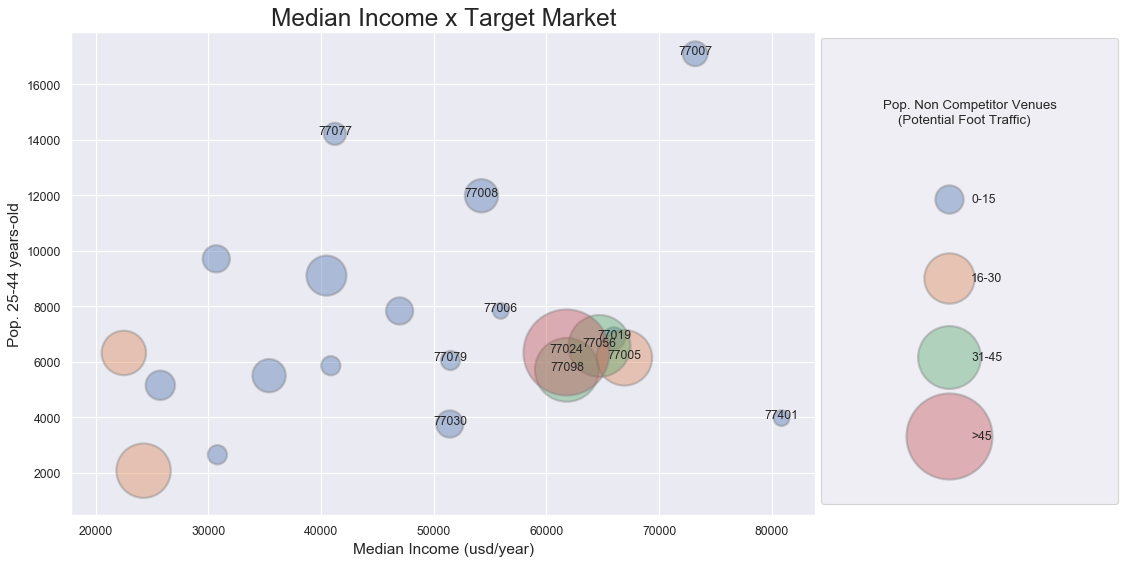

In [327]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

N = 50
M = 5 # Number of bins

# create data
x = df['Median Income'].tolist()
y = df['Population 25-44 with Degree'].tolist()
a2 = df['Promoters of foot traffic']

# Create the DataFrame from your randomised data and bin it using groupby.
df_temp = pd.DataFrame(data=dict(x=x, y=y, a2=a2))
bins = np.linspace(df_temp.a2.min(), df_temp.a2.max(), M)
grouped = df_temp.groupby(np.digitize(df_temp.a2, bins))

# Create some sizes and some labels.
sizes = [50*(i+1.) for i in range(M)]
labels = ['0-15', '16-30', '31-45', '>45', '']

fig, ax = plt.subplots(figsize=(12,8), dpi= 80)
for i, (name, group) in enumerate(grouped):
    plt.scatter(group.x, group.y, s=group.a2*100, label=labels[i],cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)

plt.legend(bbox_to_anchor=(1, 1),labelspacing=5.5,borderpad=5,title="Pop. Non Competitor Venues\n    (Potential Foot Traffic)")

# Text on the top of each barplot
for i in range(len(df['zipcode'].tolist())):
    if df['Population 25-44 with Degree'][i]>10000 or df['Median Income'][i]>50000:
        plt.text(x = df['Median Income'][i]-1500 , y = df['Population 25-44 with Degree'][i], s = df['zipcode'][i], size = 11)


# Add titles (main and on axis)
plt.xlabel("Median Income (usd/year)", fontdict={'size':14})
plt.ylabel("Pop. 25-44 years-old", fontdict={'size':14})
plt.title("Median Income x Target Market", fontdict={'size':22})

plt.show()

### Competition Analysis

Comparing the selected top 4 neighborhoods

In [334]:
list_zip=[6,9,11,13]

df['Other competitors']=df['High level of competition']+df['Medium level of competition']+df['Low level of competition']
df['Other competitors _ weighted']=(df['High level of competition']*5+df['Medium level of competition']*3+df['Low level of competition'])/9

new_df=df.loc[list_zip,['zipcode','Median Income','Population 25-44 with Degree','Cafe and Tea House','High level of competition','Medium level of competition','Low level of competition','Promoters of foot traffic','Other competitors','Other competitors _ weighted']]

# Normalizing the data
#------------------------
# replace (original value) by (original value)/(maximum value)
new_df['Median Income'] = new_df['Median Income']/new_df['Median Income'].max()
new_df['Population 25-44 with Degree'] = new_df['Population 25-44 with Degree']/new_df['Population 25-44 with Degree'].max()
new_df['Cafe and Tea House'] = new_df['Cafe and Tea House']/new_df['Cafe and Tea House'].max()
new_df['High level of competition'] = new_df['High level of competition']/new_df['High level of competition'].max()
new_df['Medium level of competition'] = new_df['Medium level of competition']/new_df['Medium level of competition'].max()
new_df['Low level of competition'] = new_df['Low level of competition']/new_df['Low level of competition'].max()
new_df['Promoters of foot traffic'] = new_df['Promoters of foot traffic']/new_df['Promoters of foot traffic'].max()
new_df['Other competitors']=new_df['Other competitors']/new_df['Other competitors'].max()
new_df['Other competitors _ weighted']=new_df['Other competitors _ weighted']/new_df['Other competitors _ weighted'].max()

df_radar1=new_df.loc[list_zip,['zipcode','Median Income','Population 25-44 with Degree','Cafe and Tea House','High level of competition','Medium level of competition','Low level of competition','Promoters of foot traffic']]
df_radar2=new_df.loc[list_zip,['zipcode','Median Income','Population 25-44 with Degree','Cafe and Tea House','Other competitors','Promoters of foot traffic']]
df_radar3=new_df.loc[list_zip,['zipcode','Median Income','Population 25-44 with Degree','Cafe and Tea House','Other competitors _ weighted','Promoters of foot traffic']]


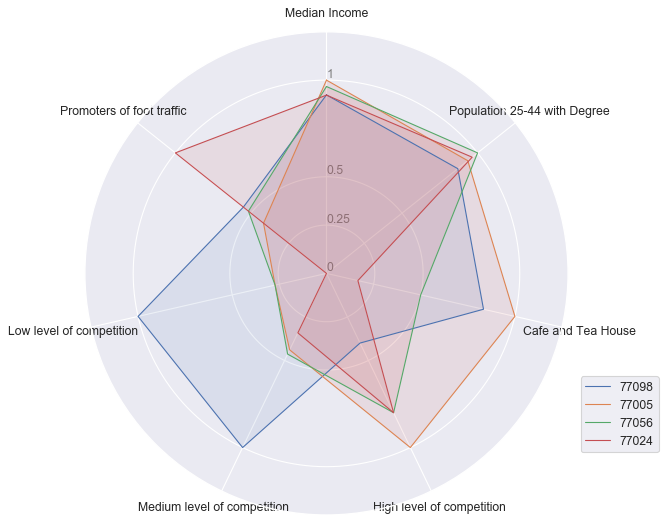

In [344]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

fig, ax = plt.subplots(figsize=(12,8), dpi= 80)

# Set data
df_radar1

 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar1)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,1], ["0","0.25","0.5","1"], color="grey", size=11)
plt.ylim(0,1.25)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

'Median Income','Population 25-44 with Degree','Cafe and Tea House','High level of competition','Medium level of competition','Low level of competition','Promoters of foot traffic'
# Ind1
values=df_radar1.loc[6].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77098")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_radar1.loc[9].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77005")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df_radar1.loc[11].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77056")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values=df_radar1.loc[13].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77024")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.3))


##### Running an analysis by adding up all competitors in a single variable

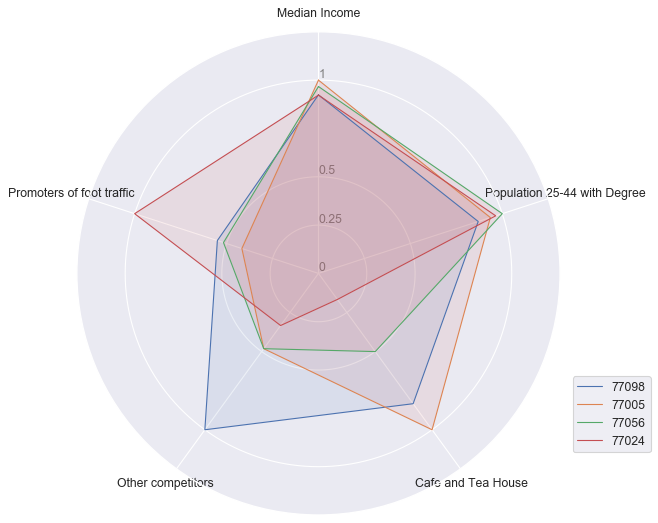

In [343]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

fig, ax = plt.subplots(figsize=(12,8), dpi= 80)

# Set data
df_radar2

 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar2)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,1], ["0","0.25","0.5","1"], color="grey", size=11)
plt.ylim(0,1.25)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=df_radar2.loc[6].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77098")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_radar2.loc[9].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77005")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df_radar2.loc[11].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77056")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values=df_radar2.loc[13].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77024")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.3))


##### Running an analysis by adding up all competitors in a single variable using diff weights for different levels of competition

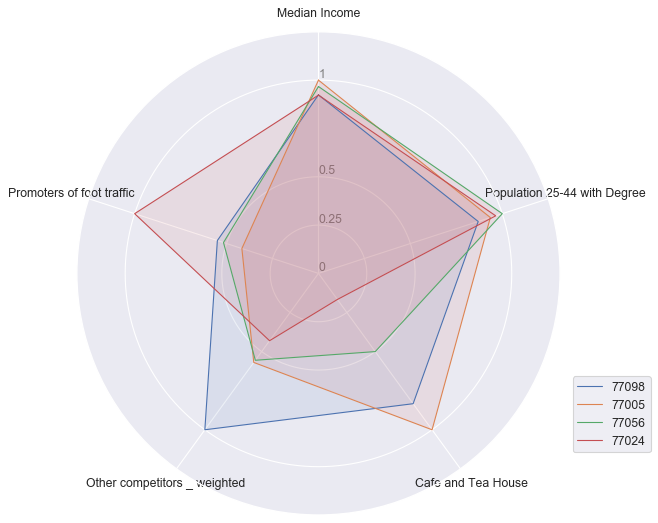

In [340]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

fig, ax = plt.subplots(figsize=(12,8), dpi= 80)

# Set data
df_radar3

 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar3)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([0,0.25,0.5,1], ["0","0.25","0.5","1"], color="grey", size=11)
plt.ylim(0,1.25)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable

'Median Income','Population 25-44 with Degree','Cafe and Tea House','High level of competition','Medium level of competition','Low level of competition','Promoters of foot traffic'
# Ind1
values=df_radar3.loc[6].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77098")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_radar3.loc[9].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77005")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=df_radar3.loc[11].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77056")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind4
values=df_radar3.loc[13].drop('zipcode').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="77024")
ax.fill(angles, values, 'r', alpha=0.1)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.3))


In [353]:
# Creating a Dataframe with the data of the selected neighborhoods
list_zip=[6,9,11,13]
df.loc[list_zip,['Neighborhood','zipcode','Latitude','Longitude','Median Income','Population 25-44 with Degree','Cafe and Tea House','High level of competition','Medium level of competition','Low level of competition','Promoters of foot traffic']]

,Neighborhood,zipcode,Latitude,Longitude,Median Income,Population 25-44 with Degree,Cafe and Tea House,High level of competition,Medium level of competition,Low level of competition,Promoters of foot traffic
6,Upper Kirby,77098,29.74,-95.41,61816,5714,5,2,41,11,33
9,"West University Place, Southside Place, Southa...",77005,29.72,-95.42,66926,6148,6,5,18,3,25
11,"Galleria, Uptown,",77056,29.74,-95.47,64714,6575,3,4,19,3,31
13,"Memorial, Memorial Villages",77024,29.78,-95.54,61733,6340,1,4,14,0,60


### Creating map charts to better understand the location of the neighborhoods under analysis

In [216]:
# Let's take a quick look at the neighborhoods

address = 'Houston, Texas'
geolocator = Nominatim(user_agent="houston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_houston = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, zipcode in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['zipcode']):
    label = '{}'.format(zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_houston)  
    
map_houston

### Creating map charts differentiating the selected neighborhoods

In [349]:
# Let's take a quick look at the neighborhoods

address = 'Houston, Texas'
geolocator = Nominatim(user_agent="houston_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_houston = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, zipcode in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['zipcode']):
    if zipcode==77056:
        label = '77056: Memorial, Memorial Villages'
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_houston) 
    elif zipcode==77005 or zipcode==77024 or zipcode==77098:
        label = '{}'.format(zipcode)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_houston) 
    else:
        label = '{}'.format(zipcode)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_houston)  
    
map_houston